## Interacting with files

In [1]:
from cirro import DataPortal

portal = DataPortal()

Find the file you are looking for by defining the project and dataset, then searching for a particular file of interest based on a pattern using `filter_by_pattern`

In [2]:
# Get the project which contains the dataset
project = portal.get_project_by_name('Test Project')

# Get the set of datasets within that project
all_datasets = project.list_datasets()
print(f"The project {project.name} contains {len(all_datasets):,} datasets")

# Get the dataset of interest based on its name
dataset = all_datasets.get_by_name('Test of mageck-count')

# Get the complete list of files in that dataset
files = dataset.list_files()
print(f"Dataset {dataset.name} contains {len(files):,} files")

# Filter to just the files named counts.txt (using the wildcard to match the string of folders it is in)
counts = files.filter_by_pattern("*/counts.txt")

print(f"Selected the file: {counts.description()}")

The project Test Project contains 104 datasets
Dataset Test of mageck-count contains 32 files
Selected the file: data/mageck/count/combined/counts.txt (2090653 bytes)


Load the contents of that file into a DataFrame (keeping in mind that it is tab-delimited, not the default comma-delimited)

In [3]:
df = counts[0].read_csv(sep="\t")
df.head()

,sgRNA,Gene,MO_Brunello_gDNA_2,MO_Brunello_1,MO_Brunello_2,MO_Brunello_gDNA_1
0,A1BG_0,A1BG,0,0,0,0
1,A1BG_1,A1BG,0,0,0,2
2,A1BG_2,A1BG,0,0,0,0
3,A1BG_3,A1BG,0,0,2,0
4,A1CF_36946,A1CF,0,0,0,0


You can also view any artifacts produced by running the analysis, such as the workflow report, graph, or logs.

In [3]:
from cirro_api_client.v1.models import ArtifactType

# Reading nextflow trace file
trace_file = dataset.get_artifact(ArtifactType.WORKFLOW_TRACE)
trace_df = trace_file.read_csv(sep="\t")
trace_df.head()

,task_id,hash,native_id,name,status,exit,submit,duration,realtime,%cpu,peak_rss,peak_vmem,rchar,wchar
0,7,99/b42c07,826623a0-0ed5-44ff-8a94-e3802cccf531,trim:trim_adapters (4),COMPLETED,0,2022-05-24 16:27:01.413,5m 38s,1s,76.6%,3.1 MB,5.4 MB,1.8 MB,900.5 KB
1,5,71/8e3d51,ace41478-ba98-403d-a6d1-3e95ad64c36f,trim:trim_adapters (3),COMPLETED,0,2022-05-24 16:27:01.421,5m 38s,4s,6.4%,11.6 MB,17.3 MB,1.8 MB,900.5 KB
2,8,71/535e08,9d499098-6ed7-422b-9233-9983f775fdee,fastqc (4),COMPLETED,0,2022-05-24 16:27:01.464,5m 48s,3s,104.8%,152.7 MB,3.2 GB,15.9 MB,4.1 MB
3,1,41/c494ef,3a221dd3-7ca8-41e1-8212-856b6154be64,fastqc (1),COMPLETED,0,2022-05-24 16:27:01.465,5m 48s,3s,102.5%,140.2 MB,3.2 GB,16 MB,4.1 MB
4,2,25/13b116,94f91d55-1d41-4afd-88b4-743d75817032,trim:trim_adapters (1),COMPLETED,0,2022-05-24 16:27:01.476,5m 58s,1s,75.8%,3.1 MB,5.4 MB,1.8 MB,900.5 KB


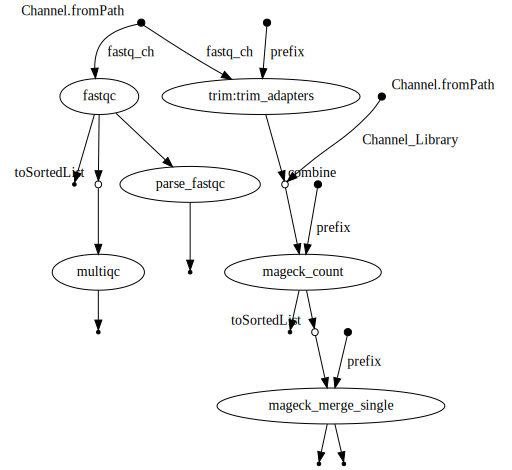

In [6]:
from IPython.display import display, SVG

# Displaying the workflow graph
graph = dataset.get_artifact(ArtifactType.WORKFLOW_DAG)
display(SVG(graph.read()))